# Previous Lesson Review: Day 7 Introduction to Plotting

In the previous lesson you learned how to:

- Plot basic plots in Matplotlib
- Make multiple subplots in one figure
- Plot multiple lines on one figure
- Make scatterplots and histograms
- Plot using a function

In the next lessons we will learn how to organize and process tabular data that we can later visualize with matplotlib and other plotting libraries.

# Day 8: Introduction to Pandas

# 1. PANDAS

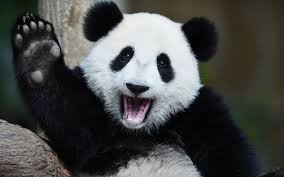

1.  Now we are going to use [pandas](https://pandas.pydata.org/pandas-docs/version/0.25.3/). Pandas is the Python Data Analysis Library and is popular because it allows the user to manipulate and clean large amount of data. 

- Pandas and numpy come from the SciPy library and much of the Pandas data analysis is similar to Numpy. While numpy works with numerical arrays, Pandas works with series and DataFrames that can have mixed datatypes. Pandas lets us take complicated datasets (dates, long names, missing data) and anlyze them.

- You can think of it like a supercharged excel where you combine the organization of excel with the power of a programming language.

2. Just like we use np as a shortcut for numpy, we use pd for pandas
----
3.  Extra tips: you can see I made a numbered list in markdown. To do that, you type a number, a period, and then two spaces. To make bulletpoints use a "-"  and then a space.

4. To add an image: start a new cell, change to markdown and drag image from desktop. I'm sure there are other ways but this is how I do it :)

# Goals:

Students will be able to :


1. Create a dataframe from scratch
2. Read in tabular data into a dataframe
3. View and access data in the dataframe
4. Save and export a dataframe

# System version when preparing this notebook

- python 3.8.11
- padas 1.1.3
- numpy 1.20.3

This lesson was prepared by Maria D Hernadez Limon for NRT Environment Science Bootcamps 2021. Code use for reading excel and url may not work if libraries used are older versions than used for the preparation of this notebook.


In [ ]:
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
#this line will ensure that matplot prints in jupyter notebook not a pop up window
%matplotlib inline

In [ ]:
#sanity check my versions
print (pd.__version__)

## 1. DataFrame Intro

DataFrames are tables. 2D arrays. They consists of rows and columns. The labels of the rows and columns are knows as the index. Remeber that in a book an index helps you find the location of topics, similarly in a table the index can be used to find the data you want. The rows are known as index=0 and columns as index=1. More on this later.



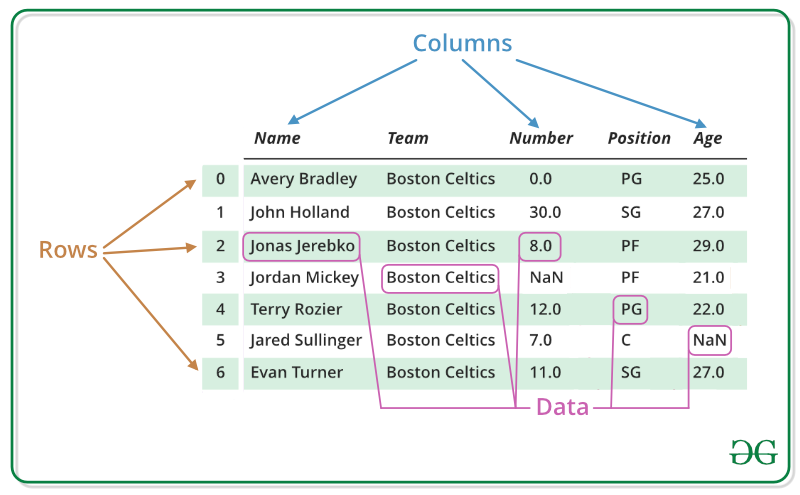


Columns are a type of [series](https://www.geeksforgeeks.org/python-pandas-series/) and must usually contain the same data type, when this is not the case you get into many issues.


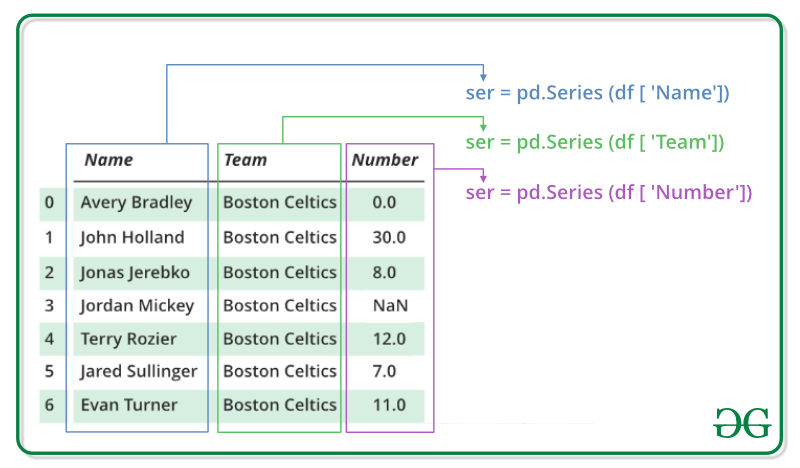


# 2. DataFrame from scratch

While most of the time you will work with data that is already in a tabular format, it is important that you know how to construct a dataframe from scratch.

Let's call HELP and look at all the option to make a pandas dataframe:

In [ ]:
#help(pd.DataFrame()) also works
?pd.DataFrame

Now let's explore some ways to make dataframes from scratch. I will show you 4 ways:
1. Using arrays 
2. Using dictionaries
3. Appending 
4. Copy

#### pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)

Where data are the values we want in the table, index is the label for the rows, columns is the labels for the columns.

More on dataframes here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [ ]:
##make an empty dataframe
my_df=pd.DataFrame()

#to see the table write the name as the last line of the cell
my_df

### 2.1 With Arrays (2D arrays)

- ### numeric

Tables are collections of rows/columns. When using arrays each bracket holds a row, and each item in the row is a column.

In [ ]:
## You can add data, specify the row and column labels 
data=np.array([[1, 2, 3], 
               [4, 5, 6], 
               [7,8,0], 
               [1,10,100]])

my_index=[1,2,3,4]
my_columns=['A','B','C']

my_df = pd.DataFrame(data,index=my_index,columns=my_columns)
my_df

In [ ]:
display(my_df)

In [ ]:
print (my_df)

- ### strings

In [ ]:
data=np.array([['a', 'b', 'c','x'], 
               ['d', 'e', 'f','y']])

my_index=['x','y']
my_columns=['col_a','col_b','col_c','col_d']

my_df = pd.DataFrame(data,index=my_index,columns=my_columns)
my_df

### 2.2 With dictionaries and lists
- We pass dictonaries to the data option and leave the other options alone, the pandas takes the key as the column and the value as the row. You have to tell the index option how to name the rows and this will depend on how many values you have for each key you have.

In [ ]:
key=['cat', 'dog', 'squid', 'moose', 'falcon']
value=np.arange(len(key))

animal_num_dict=dict(zip(key,value))
print (animal_num_dict)

my_df_from_dict=pd.DataFrame(animal_num_dict,index=range(1))
my_df_from_dict

In [ ]:
my_df= pd.DataFrame({'A':[1,4,7],'B':[2,5,9],'C':[3,6,8]},index=range(3))
my_df

In [ ]:
list_a=np.arange(10)
list_b=list_a*2
list_c=list_a**2

my_df= pd.DataFrame({'simple_nums':list_a,'nums*2':list_b,'nums**2':list_c},index=range(len(list_a)))
my_df

### 2.3 Appending 
- With this method you can add columns but adding rows is a little more complicated. Notice that in the previous examples we defined the row index as some labels and in this examples we don't do that so the labels are numbers starting from 0.

In [ ]:
my_df=pd.DataFrame()
my_df['A']=[1,4]
my_df['B']=[2,5]
my_df['C']=['C','D']

my_df

In [ ]:
my_df=pd.DataFrame()
my_df['A'],my_df['B'],my_df['C']=[1,4],[2,5],['C','D']
my_df

In [ ]:
#make a new dataframe--same technique as above
my_df_2=pd.DataFrame({'A':[1,4],'B':[2,5],'C':[3,6]},index=my_index)

#append tanble 2 to table 1 
#append adds to the end, similarly to when add to a list 
my_df_plus_df2=my_df.append(my_df_2)

my_df_plus_df2

There are more ways of combining tables and I will show how in th next lesson.

Each column and row in a dataframe can be considered as a series and can be str or numeric, or, if you are evil, a mix of datatypes. So we can add columns/rows by adding series, lists, sets,  you name it. You can find more info on working with empty dataframes [here.](https://thispointer.com/pandas-how-to-create-an-empty-dataframe-and-append-rows-columns-to-it-in-python/)

### 2.4. Copying an existing table 

This is cheating because we aren't making a table from scratch... but making a copy is also a way to make a table.

Keep in mind that unless you make a copy of a dataframe changes that you make will happen to your original dataframe. This is really important when we talk about subsetting data!

In [ ]:
my_new_frame=my_df.copy()
my_new_frame

# 2.5 With a function

In [ ]:
def make_simple_table(num_rows,num_cols):
    """This function will make tables with different row/col combinations- the table will be full of num 7
    """
    my_df=pd.DataFrame(7,index=range(num_rows),columns=range(num_cols))
    return my_df

make_simple_table(3,3)

There is a more detailed example at the end of this notebook.

# 2.6 Skills practice
Make a dataframe with two columns, one column with your favorite three names and a second column with the number of letters in those names. You can use whatever method you want.

In [ ]:
#### your work here
##Tip: copy the code for your favorite method from above, and edit your code




# **BREAK** 2 mins

# 3. Read in Data

## 3.0 Set directory: Showing Pandas where the files are

run this command to remind yourself where you are working

In [ ]:
pwd

Our data files are in the folder you downloaded called data. We can tell python where that data is once so you don't have to type the path everytime. 

In [ ]:
#this is the specific directory where the data we want to use is stored
datadirectory = '../data/'

#this is the directory where we want to store the data we finish analyzing
data_out_directory='../output/'

Pandas has many built in function that we can call by doing pd.(function we want). [Here is a list of functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) we can use to read in (input) a document based on the kind of data you are working with. We can also save (output) new tables we create.

In [ ]:
help(pd.read_csv)

## 3.0 Load Pokedex

We will use pokemon database to learn some python basics, we will use real science data for more advanced analysis.
Pokemon data source https://www.kaggle.com/rounakbanik/pokemon

Pandas has many built in fuctions to read in tabular files from different formats including csv,txt,url, and more.


To read in csv we use pd.read_csv and this is the full set of parameters this function takes:

pandas.read_csv(filepath_or_buffer, sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors='strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None, storage_options=None

## 3.1 Read in .csv file

We can add strings together to get the location of our files. Since we set datadirectory to the location of the files we can add this string to the name or our file for the complete location.

In [ ]:
print (datadirectory+'Pokemon.csv')

In [ ]:
#to read in a csv call read_csv from pd which looks like pd.read_csv
pokemon_csv=pd.read_csv(datadirectory+'Pokemon.csv')
pokemon_csv

## 3.2  Read txt files, or files with non ',' delimeters

In [ ]:
#let's try reading in the .txt file with pd.read_csv and see what happens 
pokemon_txt=pd.read_csv(datadirectory+'Pokemon.txt')
pokemon_txt.head()

Because the delimiter (the symbol that separates data entries) is , in a csv reading a txt that is \t delimited does not work. There are two ways around this:

### - Method 1, call pd.read_csv and set the delimiter to '\t' to override the ',' default

In [ ]:
pokemon_txt=pd.read_csv(datadirectory+'Pokemon.txt',delimiter='\t')
pokemon_txt

### - Method 2, call pd.read_table that has '\t' as the default delimeter

In [ ]:
pokemon_txt=pd.read_table(datadirectory+'Pokemon.txt')
pokemon_txt

## 3.3 Read in Excel (multiple sheets)

To work with files formatted by excel (multiple sheets) .xlsx or .xlsx we need to import opempyxl. More info here https://openpyxl.readthedocs.io/en/stable/ and here https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html.

In [ ]:
#usually you load all your modules in one block at the start of the notebook but I didn't in this case for organization
from openpyxl import Workbook

In [ ]:
#this workbook has 3 sheets (Green, Blue, Red)
pokemon_excel_red=pd.read_excel(datadirectory+'Pokemon.xlsx', sheet_name='Red', engine='openpyxl')
pokemon_excel_red

In [ ]:
#this workbook has 3 sheets (Green, Blue, Red)
pokemon_excel_blue=pd.read_excel(datadirectory+'Pokemon.xlsx', sheet_name='Blue', engine='openpyxl')
pokemon_excel_blue

## 3.4 Read in from websites*

Sometimes data is stored on open servers that you can access via weblink. In this case we can point jupyter to the url and retrieve the data using pandas. Usually the data will not look pretty but we can work on that. May crush during class if everyone goes at the same time.

In [ ]:
#Lake Ice Density 2011-2012
url="http://coastwatch.glerl.noaa.gov/statistic/ice/dat/g2011_2012_ice.dat"

#read in data
df_url=pd.read_csv(url,encoding='utf-8')
df_url

## 3.4 Read in data from an API (Application programing interface)

I don't have time to go over this but here is a wonderful example from National Solar Radiation Dabase:
https://nsrdb.nrel.gov/data-sets/api-instructions.html

## 3.5 Skills Practice

Use the next code block to open a datafile you have in your computer. Look for a file that you are not using for the bootcamp. I've written some tips.

To find the location of a file, open a new terminal window (don't close the terminal running jupyter), drag the file to the terminal and tada you get the location. Otherwise move your data file to the Desktop for now and practice getting files from other locations later.

In [ ]:
## Where is your file? 
## for example file_location= '/Users/maria_hernandez/Documents/sub_folder/folder_with_my_file/'
file_location=

## remember to use the appropiate command for your file type
## for example pd.read_csv(mycsv_location+my_csvfile.csv)
my_file=

#this line will allow us to see the doc
my_file

# 4. Data input options

As you may expect, the data you will work with may not always look this neat, you may have to skip rows or change delimeters. There are many ways to do that. I won't spend time discussing how to do that here but I want you to know that you can find that information in the pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

Reducing the amount of data you read in can speed up pandas.

In [ ]:
# pd.info() gives you the information for each column and the total memory usage
pokemon_selected=pd.read_csv(datadirectory+'Pokemon.csv')
pokemon_selected.info()

In [ ]:
### let's only read in the first 5 rows and two columns
pokemon_selected=pd.read_csv(datadirectory+'Pokemon.csv',usecols=['Name','Speed'],nrows=5)
pokemon_selected

In [ ]:
#this reduces the memory usage and will speed up your analysis
pokemon_selected.info()

# Break 5 mins

# 5. Viewing the dataframe

## 5.0 Dataframe basics
I am going to make a copy of the pokemon_csv so I can change the name of the table. I could also read in the file again and assign a new variable but copy is a shorter command.


View the shape to get the number of rows and columns of the table. The first number is the number of rows and the second is the numer of columns. You can slect the values as with lists in you need them.

In [ ]:
pokemon_df=pokemon_csv.copy()
pokemon_df.shape

In [ ]:
pokemon_df.shape[0]

In [ ]:
pokemon_df.size

In [ ]:
pokemon_df.transpose()

## 5.1 View head and tail

#### - View head

In [ ]:
#.head() is a fucntion so this means you have options
pokemon_df=pokemon_csv.copy()
pokemon_df.head()

In [ ]:
pokemon_df.head(2)

If you don't specify how many rows you want to see, you get 5 as the default.

#### - View tail

In [ ]:
# to view the last lines we use .tail()
pokemon_df.tail()

In [ ]:
pokemon_df.tail(7)

If you don't specify how many rows you want to see, you get 5 as the default.

## 5.2 View columns

There are three ways two get the names of all the columns:

In [ ]:
pokemon_df.columns

In [ ]:
pokemon_df.keys()

In [ ]:
list(pokemon_df)

All three options return values that can be indexed.

## 5.3 Call columns

Remeber that columns are series attached to each other to make a table. There are two ways to call and view columns:
#### - 1. with .(dot) notation

In [ ]:
pokemon_df.Name

#### - 2. with brackets [ ], using . notation only works when your column names don't have spaces. In general we don't use dot nottaion because it gets messy.

In [ ]:
## but this gets messy when the names have symbols, like spaces
### This cell is ment to run as an error since the name has a space
pokemon_df.Type 1

In [ ]:
# we can use [] 
pokemon_df['Type 1']

## 5.4 the rows (aka 'the index')
The index is important because while the value inside your table may change with your analysis the index remains unchaged. Think of the address of a house, you may remodel the house but the address stays the same thats why your friends can find your house even when you change the color, thats the job of the index.


#### - get the row or 'index' names

In [ ]:
#the current index is numbers from 0-799 so that's why the output looks like this
pokemon_df.index

In [ ]:
list(pokemon_df.index)

#### - Change index - We can change the index by setting a new column as the index.

In [ ]:
##change the index to name and since we want the change in our current dataframe we use inplace=True
pokemon_df.set_index('Name',inplace=True)
pokemon_df.head()

#### - view index

In [ ]:
pokemon_df.index

#### - select from the index

In [ ]:
pokemon_df.index[0:10]

- #### reset index - sets index back to numerical values from 0 to len(table)

In [ ]:
pokemon_df.reset_index(inplace=True)
pokemon_df.head()

# BREAK 2mins

# 6. Selecting specific data  [Indexing]

You can select data from a pandas dataframe by selecting rows or columns. You can also select data based on position with .iloc or with condiitons using .loc. [or a combination of both using .ix, but this is archaic and strongly discouraged in the pandas community] 

## 6.1  Sorting values
To view based on some sorted values we use sort_values().
This function takes a few commands such as 'by'= the column to sort by, 'ascending'=how to sort the data, and finally 'inplace' in you want the changes made in your original table.  

- tell ascending True if you want values to increase or False if you want them to decrease 
- tell inplace True if you want the changes to be made in our original df or leave it blank....but if you do this you must create a new variable that stores the the sorted dataframe  


DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

In [ ]:
pokemon_df.sort_values(by='Total', ascending=True, inplace=True)
pokemon_df.head()

# or
# pokemon_sorted=pokemon_df.sort_values(by='Total', ascending=True)
# pokemon_sorted.head()

- #### Sort by alphabetical order. 

Mechanics are the same as sorting by numerical values, except that here you must select a column with strings to sort alphabetically 

In [ ]:
pokemon_df.sort_values(by='Name', ascending=False, inplace=True)
pokemon_df.head()

In [ ]:
#let's undo the sorting to avoid issue later
pokemon_df.sort_values(by='Name', ascending=True, inplace=True)
pokemon_df.head()

- #### Sort columns based on a row
I rarely do this, but you can also rearrange your columns based on a row you select


In [ ]:
my_df_sorted=pd.DataFrame({'D':[1,4,7],'E':[2,5,9],'Z':[3,6,8]},index=range(3))

#to change the columns your by must be a row number and you must specify that you want to change axis 1-> the columns
my_df_sorted.sort_values(by=0,ascending=False,inplace=True,axis=1)
my_df_sorted

# 6.1 Skills practice
Create a new variable that holds pokemon_df sorted by increasing HP. 

#Hint: inplace should be False

In [ ]:
##your code here
hp_sort=

#to see new table
hp_sort

## 6.2 Select based on position using *.iloc*

.iloc uses intergers, the specifc locations of the rows and columns.
To select data we run df.iloc[row,column]. The values here are inclusive of the first value but exlusive of the second so 0:3, would select 0,1,2. The i in front of loc means interger, so we are indexing with the interger location.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

All the numpy slicing comes into play here!! Revisit the Numpy notebooks.

In [ ]:
##table for reference 
pokemon_df.head()

In [ ]:
#select row 2-4 and columns 3-6
pokemon_df.iloc[2:5,3:7]

In [ ]:
# select rown 2-4 and columns 7 and 9

pokemon_df.iloc[2:5,[7,9]]

In [ ]:
## skip rows, select columns 3,7,10
pokemon_df.iloc[0:8:2,[3,7,10]]

The selection with iloc can be more complex similarly to selecting from lists or arrays. This is just a quick example to show you the utility of iloc. This is only a view if you want the data you selected as a new table you must initialize a new variable.

In [ ]:
iloc_subset_df=pokemon_df.iloc[2:5,[7,9]].copy()
iloc_subset_df

## 6.2 Skills practice

Create a new variable that holds the last 10 rows of pokemon_df and all the columns.

In [ ]:
#### Your code





## 6.3 Select based on condition using *.loc* 

This works the same as loc in that you need to specify a row and column value. The difference is that instead of using position you specify a condition.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html


In [ ]:
##table for reference 
pokemon_df.head()

#### loc also needs directions for the rows and columns "my_pd.loc[row condition,colum condition]"
If you leave the row or column condition empty python will assume you want all the rows or columns

In [ ]:
#will grab all values in the index between 0 and 10 - not the location like iloc
pokemon_df.loc[0:10,]

First we will change the index to Name so we can use that as our selection condition.

In [ ]:
##change the index to Name so that we can refer to pokemon by name.
pokemon_by_Name=pokemon_df.set_index('Name')


#here the row condition will be pokemon from L to P, and for columns those from 'Total' to 'Defense'
pokemon_by_Name.loc['Lugia':'Pichu','Total':'Defense']

This is only a view if you want the data you selected as a new table you must initialize a new variable.

In [ ]:
loc_subset_df=pokemon_by_Name.loc['Lugia':'Pichu','Total':'Defense'].copy()
loc_subset_df

### 6.31 We can also use conditional statements to select values. And conditions can get complicated quickly depending on your data. 

In [ ]:
#here we are telling pandas to select the rows where the column 'Name' is 'Pichu', and all the columns
pokemon_df.loc[pokemon_df['Name']=='Pichu',]

The resulty above is just to view, if you want to save this subset of the data to a new table then you can by setting up a new variable and copying the table.

In [ ]:
pichu=pokemon_df.loc[pokemon_df['Name']=='Pichu',].copy()
pichu

### 6.32 We can also use boolean conditions

In [ ]:
#here we are telling pandas to select the rows where the column 'Legendary' is 'True',and all the columns
pokemon_df.loc[pokemon_df['Legendary']==True,].head()

### 6.33 We can select based on multiple string values.

In [ ]:
#here we are telling pandas to select the rows where the column 'Type 1' contains the words Fire or Grass,and all the columns
# the | means 'or', while & means 'and'

pokemon_df.loc[pokemon_df['Type 1'].str.contains('Fire|Grass'),].head()

### 6.34 Select based on a list

In [ ]:
my_favorite_pkm=['Hoothoot','Gardevoir','Charmeleon','Darkrai','Mewtwo','Pikachu']

marias_favorites=pokemon_df.loc[pokemon_df['Name'].isin(my_favorite_pkm)].copy()
marias_favorites

### 6.35 We can also select based on specifc numerical conditions.

In [ ]:
#here we are telling pandas to select the rows where the column 'Speed' is greater than 50,and all the columns
pokemon_df.loc[pokemon_df['Speed']>50,]

In [ ]:
#here we are telling pandas to select the rows where the column 'Speed' is between two values,and all the columns
pokemon_df.loc[pokemon_df['Speed'].between(50,80),].head()

In [ ]:
#here we are telling pandas to select the rows where the column 'Speed' is >100 or where 'Attack' is >100,and all the columns
pokemon_df.loc[((pokemon_df['Speed']>100) | (pokemon_df['Attack']>100)),].head()

In [ ]:
#here we are telling pandas to select the rows where the column 'Speed' is >100 'AND' where 'Attack' is >100,and all the columns
pokemon_df.loc[((pokemon_df['Speed']>100) & (pokemon_df['Attack']>100)),].head()

### 6.36 Select columns 

- #### Based on name

In [ ]:
pokemon_df.loc[:,['Speed','Name']]

- #### Based on a condition

In [ ]:
print(pokemon_df.columns)
print(pokemon_df.columns.str.len())

In [ ]:
pokemon_df.loc[:,pokemon_df.columns.str.contains('a')]

In [ ]:
pokemon_df.loc[:,pokemon_df.columns.str.len()>7]

In [ ]:
cols_wanted=['Name','Attack','HP']
pokemon_df.loc[:,pokemon_df.columns.isin(cols_wanted)]

- #### Using df.query
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

DataFrame.query(expr, inplace=False, **kwargs)
Note: inplace is an option

In [ ]:
pokemon_df.query('Attack == Defense')

In [ ]:
pokemon_df.loc[pokemon_df['Attack']==pokemon_df['Defense'],]

In [ ]:
pokemon_df.query('Attack < HP')

### 6.37 NOT
We can also select for values that don't include some condition with ~

In [ ]:
pokemon_df.loc[~pokemon_df['Type 1'].str.contains('Fire|Grass'),].head()

In [ ]:
my_favorite_pkm=['Hoothoot','Gardevoir','Charmeleon','Darkrai','Mewtwo','Pikachu']

not_marias_favorites=pokemon_df.loc[~pokemon_df['Name'].isin(my_favorite_pkm)].copy()
not_marias_favorites

## 6.4 Skills Practice

Use the following code block to select Water pokemon (Type 1) with HP greater than 100, and sort them in increasing attack. 

In [ ]:
#hint you will need the & sing, and keep track of parenthesis 





# BREAK 3mins

## 6.5 Multiple commands
Using dot notation you can attach commands to each other. For cleaner code when you are staring out it may be better for you to have a line of code for each command but as you get used to coding you can start attaching more commands. Commands are executed in the order they are given so be careful.

In [ ]:
pokemon_df.loc[pokemon_df['Name'].isin(my_favorite_pkm) & (pokemon_df['Total']>200)]

In [ ]:
pokemon_df.loc[pokemon_df['Name'].isin(my_favorite_pkm) & (pokemon_df['Total']>200)].sort_values(by='Total')

In [ ]:
pokemon_df.loc[pokemon_df['Name'].isin(my_favorite_pkm) & (pokemon_df['Total']>200)].sort_values(by='Total').iloc[0:3]

# 6.6 Making quick plots
One of the reasons pandas is so convinient is because you can quickly make plots from your tables without having to call all the params you usually need for a plt. We can do this because pandas has built in matplotlib functions. 

Of course if we want to make publication worthy figures we will need matplotlib or seaborn to customize everypart of our plot.

More here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

I'll show more examples in the next few days.

In [ ]:
my_favorite_pkm=['Hoothoot','Gardevoir','Charmeleon','Darkrai','Mewtwo','Pikachu']

wanted_subset=pokemon_df.loc[(~pokemon_df['Name'].isin(my_favorite_pkm)) & (pokemon_df['Total']>650)]
wanted_subset.plot(x='Name',y='Total',kind='bar',
                   xlabel='Pokemon_name',ylabel='Total Stats',title="Not my Favorites but Strong",
                  ylim=(600,800))

In [ ]:
wanted_subset=pokemon_df.loc[(~pokemon_df['Name'].isin(my_favorite_pkm)) & (pokemon_df['Total']>650)]
wanted_subset.plot(x='Name',y='Total',kind='bar',
                   xlabel='Pokemon_name',ylabel='Total Stats',title="Not my Favorites but Strong",
                  ylim=(600,800))

#to save
plt.tight_layout()

#I need to specify facecolor as white so when my plot saves the background is white, I need to do this because I'm running 
#my computer on darkmode and it has random effects on my plots -- having this command should noy affect your plots
#dpi is to control the resolution of your images
plt.savefig(data_out_directory+'strong_pokemon.png',facecolor='w',dpi=600)

#I usually save as a pdf since I need less commands
plt.savefig(data_out_directory+'strong_pokemon.pdf')

A more simple example:

In [ ]:
pokemon_df.plot(x='Type 1',kind='box',title="Pokemon_df_value_range")

# BREAK 2mins

# 7. Export new table

In [ ]:
#let's select the strongest legendary pokemon for fun
pokemon_out=pokemon_df.loc[(pokemon_df['Legendary']==True)&(pokemon_df['Total']>700),]
pokemon_out

To save this file to use the pd.to_csv command, this command also has a few options. In the same way we specify where our file was when we read it in we can specify where we want our new file to go.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

index is a boolean option to write row names (index), if you don't specify False or 0 then you will get an extra column with the row numbers which are often just 0-the length of your table. But in some cases you may want the index to be careful.

In [ ]:
pokemon_out.to_csv(data_out_directory+'Pokemon_out.csv',index=0)
pokemon_out

#### to save as txt

In [ ]:
pokemon_out.to_csv(data_out_directory+'Pokemon_out.txt',index=0, header=None, sep='\t')
pokemon_out

If you check your output folder you should see your new table!

### When to print the index?

In [ ]:
#set the index to name
pokemon_out.set_index('Name', inplace=True)
#let's keeo the inxed printing as false for now
pokemon_out.to_csv(data_out_directory+'Pokemon_out_with_name_index.csv',index=0)
pokemon_out

Notice the document you made is missing the Name column. Now let's save again but change index to True.

In [ ]:
pokemon_out.to_csv(data_out_directory+'Pokemon_out_with_name_index.csv',index=1)

Now our table has the Name column. Becareful when saving!

# Summary
Today I showed you the following:

1. Create new dataframes
2. Import data
3. Select data
4. Save data

I only showed you the basics to get you started, we will come back to these concepts in the following lessons.

# More Examples

In [ ]:
import string
#alphabet is a list of uppercase latters - len is 26
alphabet=list(string.ascii_uppercase)


def make_table(num_rows,num_cols,alpha_num):        
    """This function will make tables with different row/col combinations - but the max area is 26.
    The length of data available.
    """
    
    #conditional statement for alpha or numeric
    if alpha_num=='alpha':
        #if this statement is true then we my_list is a list of letters
        my_list=alphabet 
    elif alpha_num == 'num':
        #if this statement is true then my_list is a list of numbers up to the length of alphabet (26)
        my_list=range(len(alphabet))
    else:
        #if neither of the above staments are true we will get a warning and the function will stop here
        return 'Warning: check your input'

    #after the conditional statement we need to reshape the list data to hold the shape we need for our matrix
    #make array from my_list but only up to the values we need = rows*cols
    np_array=np.asarray(my_list[:(num_rows*num_cols)])
    # reshape array based on the num_rows and cols we want
    reshaped_array = np_array.reshape(num_rows,num_cols)
    
    #pass dada to pd.DataFrame
    my_df=pd.DataFrame(reshaped_array,index=range(num_rows),columns=range(num_cols))
    
    return my_df

make_table(2,6,'alpha')

In [ ]:
make_table(2,6,'num')

In [ ]:
def get_strong_pokemon(pokemon_type,lengendary_status,save_selection):
    """This function will select for the 5 strongest pokemon with the type and legendary status specified.
    It also has the option to save the selection."""
    
    data=pokemon_df.loc[((pokemon_df['Type 1']== pokemon_type) | (pokemon_df['Type 2']== pokemon_type))& (pokemon_df['Legendary']== lengendary_status)].copy()
    data_out=data.sort_values(by='Attack',ascending=False)
    out=data_out.iloc[0:5,]
    
    if save_selection=='Yes':
        out.to_csv(data_out_directory+f'strong_pkmn_{pokemon_type}_{lengendary_status}.csv',index=0)
    else:
        pass
    
    return out

get_strong_pokemon('Fire',False,'Yes')

In [ ]:
def get_strong_pokemon2(pokemon_type,lengendary_status):
    """This function will select for the 5 strongest pokemon with the type and legendary status specified.
    It will also ask the user if they want to save the selection."""
    
    data=pokemon_df.loc[((pokemon_df['Type 1']== pokemon_type) | (pokemon_df['Type 2']== pokemon_type))& (pokemon_df['Legendary']== lengendary_status)].copy()
    data_out=data.sort_values(by='Attack',ascending=False)
    out=data_out.iloc[0:5,]
    
    if input('Do you want to save? ')=='Yes':
        out.to_csv(data_out_directory+f'strong_pkmn_{pokemon_type}_{lengendary_status}.csv',index=0)
    else:
        pass
    
    return out

get_strong_pokemon2('Grass',False)

# Homework

1. Initialize a new variable that holds a data frame with only the data for pokemon from Generation 1 or 3 that are also Legendary and Psychic. Export and save this table to your output folder.
2. Create a function that returns the top and bottom three pokemon for Defense, given type (type 1 or 2) and generation as input. Add an option to save the table produced.
3. Create a new jupyter notebook and explore the data you usually work with. Try selecting different rows, columns, and subsets of the data. Save a subset of the data for practice. Try making pandas plots or more complicated plaots with your data and save the figures you make. If you don't have your own data they play around with the pokemon dataset. 

# Answers

# Check-ins:

In [ ]:
#2.6
## this is my favorite method
my_new_df= pd.DataFrame({'Names':['Gohan','Naruto','Luffy'],'Numbers':[9,7,17]})
my_new_df

#3.5 will be different for everyone
##Where is your file? 
## for example file_location= '/Users/maria_hernandez/Documents/sub_folder/folder_with_my_file/'
file_location='/Users/maria_hernandez/Documents/Virus_working/'
## remember to use the appropiate command for your file type
my_file=pd.read_csv(file_location+'inherited.csv')
#to see file
my_file


#6.1
##your code here
hp_sort=pokemon_df.sort_values(by='HP',ascending=True)
#to see new table
hp_sort


#6.4
pokemon_df.loc[((pokemon_df['Type 1']=='Water') & (pokemon_df['HP']>100)),].head()

# Homework:

# 1. 

In [ ]:
## call in my data
pokemon_df=pd.read_csv(datadirectory+'Pokemon.csv')


##STEP 1: get the generations you want first (1)
pokemon_df_selected_1=pokemon_df.loc[((pokemon_df['Generation']==1) |(pokemon_df['Generation']==3)),:].copy()
##STEP 2: get the Legendary pokemon next, from the previous df (1)
pokemon_df_selected_2=pokemon_df_selected_1.loc[pokemon_df_selected_1['Legendary']==True,:].copy()
## STEP 3: the the Psychic next, from the previous def (2)
pokemon_df_selected=pokemon_df_selected_2.loc[pokemon_df_selected_2['Type 1']=='Psychic',:].copy()

#Yes we could do all of this in one line, but keeping track of parenthesis would not be fun

###export the table, note I wrote all my answers the same so this line will work regardless of the method you use
pokemon_df_selected.to_csv(data_out_directory+'pokemon_hw.csv')

pokemon_df_selected

# 2.

In [ ]:
def get_strong_defense(pokemon_type, generation,save):
    #select based on type and generation
    data=pokemon_df.loc[((pokemon_df['Type 1']== pokemon_type) | (pokemon_df['Type 2']== pokemon_type))& (pokemon_df['Generation']== generation)].copy()
    #sort based on defense
    data_sorted=data.sort_values(by='Defense',ascending=True)
    #select the top and bottom 3
    data_out=data_sorted.iloc[[0,1,2,-1,-2,-3],]
    
    if save=='Yes':
        data_out.to_csv(data_out_directory+f'strong_def_{pokemon_type}_{generation}.csv',index=0)
    else:
        pass
    
    return data_out

get_strong_defense('Grass',2,False)